#  Testicular Cancer

To solve the question: "What's the relationship between the RNF11 and Testicular Cancer when considering the influence of age?"

## 1. Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.TGCT (1).sampleMap_TGCT_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('C:\\Users\\张宇强\\Desktop\\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [5]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,bilateral_diagnosis_timing_type,...,_GENOMIC_ID_TCGA_TGCT_gistic2,_GENOMIC_ID_data/public/TCGA/TGCT/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_TGCT_gistic2thd,_GENOMIC_ID_TCGA_TGCT_mutation_bcm_gene,_GENOMIC_ID_TCGA_TGCT_miRNA_HiSeq,_GENOMIC_ID_TCGA_TGCT_mutation_broad_gene,_GENOMIC_ID_TCGA_TGCT_PDMRNAseq,_GENOMIC_ID_TCGA_TGCT_RPPA,_GENOMIC_ID_TCGA_TGCT_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_TGCT_mutation_bcgsc_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,TCGA-2G-AAEW-01,TCGA-2G-AAEW,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,31.0,NaN,TCGA-2G-AAEW,TCGA-2G-AAEW-01A,NaN,...,TCGA-2G-AAEW-01A-11D-A42X-01,TCGA-2G-AAEW-01,TCGA-2G-AAEW-01A-11D-A42X-01,TCGA-2G-AAEW-01A-11D-A42Y-10,TCGA-2G-AAEW-01,TCGA-2G-AAEW-01A-11D-A42Y-10,TCGA-2G-AAEW-01,6A193988-A18D-4D18-914F-763613095313,09302c4e-1f97-4f55-a46e-dfbfb4403629,TCGA-2G-AAEW-01A-11D-A42Y-10
TCGA-2G-AAEX-01,TCGA-2G-AAEX-01,TCGA-2G-AAEX,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,38.0,TCGA-2G-AAEX-F68735,TCGA-2G-AAEX,TCGA-2G-AAEX-01A,NaN,...,TCGA-2G-AAEX-01A-11D-A42X-01,TCGA-2G-AAEX-01,TCGA-2G-AAEX-01A-11D-A42X-01,TCGA-2G-AAEX-01A-11D-A42Y-10,TCGA-2G-AAEX-01,TCGA-2G-AAEX-01A-11D-A42Y-10,TCGA-2G-AAEX-01,F7B402D0-EA57-4EF4-B685-BD9B1E763BB1,d3bc1c64-7a91-44b9-9060-1785dc0d42be,TCGA-2G-AAEX-01A-11D-A42Y-10
TCGA-2G-AAF1-01,TCGA-2G-AAF1-01,TCGA-2G-AAF1,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF1-F69858,TCGA-2G-AAF1,TCGA-2G-AAF1-01A,NaN,...,TCGA-2G-AAF1-01A-11D-A42X-01,TCGA-2G-AAF1-01,TCGA-2G-AAF1-01A-11D-A42X-01,TCGA-2G-AAF1-01A-11D-A42Y-10,TCGA-2G-AAF1-01,TCGA-2G-AAF1-01A-11D-A42Y-10,TCGA-2G-AAF1-01,519C1C72-9BC5-46CE-90A9-07FAC96049F2,cbb214e1-ea22-4231-815b-d27d585e61c3,TCGA-2G-AAF1-01A-11D-A42Y-10
TCGA-2G-AAF4-01,TCGA-2G-AAF4-01,TCGA-2G-AAF4,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,30.0,TCGA-2G-AAF4-F66653,TCGA-2G-AAF4,TCGA-2G-AAF4-01A,NaN,...,TCGA-2G-AAF4-01A-11D-A42X-01,TCGA-2G-AAF4-01,TCGA-2G-AAF4-01A-11D-A42X-01,TCGA-2G-AAF4-01A-11D-A42Y-10,TCGA-2G-AAF4-01,TCGA-2G-AAF4-01A-11D-A42Y-10,TCGA-2G-AAF4-01,B72BFEBF-F25B-4239-8076-C0C86D02B80D,48b3878b-e75f-4aec-b92a-590bdd006d4a,TCGA-2G-AAF4-01A-11D-A42Y-10
TCGA-2G-AAF6-01,TCGA-2G-AAF6-01,TCGA-2G-AAF6,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF6-F68859,TCGA-2G-AAF6,TCGA-2G-AAF6-01A,NaN,...,TCGA-2G-AAF6-01A-11D-A42X-01,TCGA-2G-AAF6-01,TCGA-2G-AAF6-01A-11D-A42X-01,TCGA-2G-AAF6-01A-11D-A42Y-10,TCGA-2G-AAF6-01,TCGA-2G-AAF6-01A-11D-A42Y-10,TCGA-2G-AAF6-01,A4538CA9-9E09-461E-B007-80FCC271E6F1,6e8e0cf4-134a-419b-aa8c-3ce1b8a9115a,TCGA-2G-AAF6-01A-11D-A42Y-10


In [6]:
gene_data.head()

,TCGA-2G-AAHP-01,TCGA-4K-AAAL-01,TCGA-2G-AALP-01,TCGA-2G-AAGI-05,TCGA-ZM-AA0N-01,TCGA-2G-AAGI-01,TCGA-2G-AALT-01,TCGA-2G-AAKO-01,TCGA-2G-AAFG-01,TCGA-2G-AAG6-01,...,TCGA-2G-AAKG-05,TCGA-2G-AAG9-01,TCGA-XE-AANR-01,TCGA-YU-A94I-01,TCGA-2G-AAFO-01,TCGA-2G-AALR-01,TCGA-SN-A84X-01,TCGA-XE-A8H5-01,TCGA-XE-AAOD-01,TCGA-2G-AAHT-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.064292,-0.550492,-0.357592,-2.170992,-1.099292,0.287308,1.117908,-1.294892,-0.312792,0.377908,...,-1.620992,-0.223592,-1.464992,-0.650692,-0.680692,0.141308,0.086308,-1.450792,-1.183792,-0.825592
HIF3A,2.004674,2.885874,3.188374,1.747974,1.870874,5.475574,4.570574,0.672174,0.712774,4.982474,...,1.884474,2.449574,1.259574,2.959974,1.472474,4.936574,4.065074,1.933374,1.659474,0.928274
RNF17,1.875265,9.089365,0.116965,9.729765,9.669065,0.576865,-0.531035,9.999865,9.417865,-0.531035,...,2.382765,9.357565,9.222665,-0.531035,7.320565,0.316965,3.934365,9.994165,8.364465,9.605365
RNF10,-0.002472,0.790228,0.375328,0.640328,0.777128,-0.097272,-0.082872,0.591028,-0.105672,0.197328,...,-0.256172,0.515428,0.598928,-0.035872,0.400628,0.221928,0.298228,0.427928,0.438728,0.413928
RNF11,-0.615978,0.056122,-0.587578,0.514822,-0.449078,-0.798378,-0.413378,-0.223078,0.662422,-0.389178,...,-0.825278,0.179822,-0.506078,-0.504578,-0.595578,0.047122,-0.107178,-0.019278,-0.180378,-0.427978


In [9]:
gene_fullname = 'RNF gene'
gene = 'RNF11'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Testicular Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 120 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-2G-AAHP-01,-1.064292,2.004674,1.875265,-0.002472,-0.615978,-1.81411,1.992406,3.145154,-0.423399,1.819028,...,3.479322,-1.587117,-0.569833,0.10431,2.237623,0.271514,-0.107927,-1.888995,0.116167,0.427188
TCGA-4K-AAAL-01,-0.550492,2.885874,9.089365,0.790228,0.056122,-0.83681,1.657006,2.664054,-0.423399,0.398428,...,5.332822,2.100283,0.922267,-1.28139,1.823623,0.601814,0.450673,-0.786595,-0.403633,0.473688
TCGA-2G-AALP-01,-0.357592,3.188374,0.116965,0.375328,-0.587578,-1.70761,0.752806,-0.091946,0.670101,-1.749972,...,1.860622,-0.493617,-0.173733,0.15201,2.064423,-0.493686,-1.355327,-0.779395,-3.387433,-0.311712
TCGA-2G-AAGI-05,-2.170992,1.747974,9.729765,0.640328,0.514822,-1.02511,1.627706,2.989754,0.865001,0.954628,...,5.506222,1.093183,0.982067,-0.83709,2.454823,0.074914,0.676473,-1.329995,1.166867,0.298788
TCGA-ZM-AA0N-01,-1.099292,1.870874,9.669065,0.777128,-0.449078,-1.55561,1.387906,4.036954,-0.423399,-1.259572,...,2.847922,1.717283,2.429367,-1.28139,2.661123,-0.702286,-0.923627,-0.866495,-1.060333,1.106088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-2G-AALR-01,0.141308,4.936574,0.316965,0.221928,0.047122,-1.22211,0.688906,-1.829646,-0.423399,-0.262872,...,1.787222,-0.739117,-0.257433,-0.43339,1.164723,-1.415286,0.253773,-1.282895,-5.040133,-0.632212
TCGA-SN-A84X-01,0.086308,4.065074,3.934365,0.298228,-0.107178,-0.89591,0.512406,1.869954,-0.423399,1.124828,...,4.131222,2.142183,1.098167,0.02401,1.600223,0.576014,0.755673,-0.642795,1.267167,0.174988
TCGA-XE-A8H5-01,-1.450792,1.933374,9.994165,0.427928,-0.019278,-1.58611,1.422206,1.607654,-0.025399,1.448328,...,4.493322,1.521283,0.231067,0.78101,3.572423,-1.855486,-0.254427,-2.410995,-0.491333,0.472288
TCGA-XE-AAOD-01,-1.183792,1.659474,8.364465,0.438728,-0.180378,-1.05931,2.563506,2.932654,0.144101,-0.229372,...,4.447522,0.692583,1.368167,0.00901,1.750023,0.715414,0.718673,-0.671495,1.416267,0.495088


In [10]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,bilateral_diagnosis_timing_type,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,TCGA-2G-AAEW-01,TCGA-2G-AAEW,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,31.0,NaN,TCGA-2G-AAEW,TCGA-2G-AAEW-01A,NaN,...,4.207622,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788
TCGA-2G-AAEX-01,TCGA-2G-AAEX-01,TCGA-2G-AAEX,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,38.0,TCGA-2G-AAEX-F68735,TCGA-2G-AAEX,TCGA-2G-AAEX-01A,NaN,...,5.504822,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988
TCGA-2G-AAF1-01,TCGA-2G-AAF1-01,TCGA-2G-AAF1,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF1-F69858,TCGA-2G-AAF1,TCGA-2G-AAF1-01A,NaN,...,4.813122,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388
TCGA-2G-AAF4-01,TCGA-2G-AAF4-01,TCGA-2G-AAF4,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,30.0,TCGA-2G-AAF4-F66653,TCGA-2G-AAF4,TCGA-2G-AAF4-01A,NaN,...,4.213022,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188
TCGA-2G-AAF6-01,TCGA-2G-AAF6-01,TCGA-2G-AAF6,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF6-F68859,TCGA-2G-AAF6,TCGA-2G-AAF6-01A,NaN,...,5.124822,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488


In [12]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.22 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,GHDC,H19,SDK2,GRP,TPRN,THSD4,KIAA0895L,CHST9,CHST8,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,-11325.0,-1.463997,0.653228,-0.950242,-1.341871,-1.246386,-0.192312,0.363571,-3.996847,0.610803,...,4.207622,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788
TCGA-2G-AAEX-01,-13964.0,-1.307097,1.092128,2.463858,-2.117471,0.126514,-0.568512,0.113871,-1.720447,4.359403,...,5.504822,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988
TCGA-2G-AAF1-01,-10511.0,-1.197597,0.379128,-0.520742,-1.556971,-1.330386,-0.695012,0.624471,-1.733247,-0.364197,...,4.813122,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388
TCGA-2G-AAF4-01,-10983.0,-1.449497,-1.236272,1.108258,-2.104071,-0.793886,-1.284412,0.570271,-3.102147,2.185303,...,4.213022,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188
TCGA-2G-AAF6-01,-10281.0,-1.344497,-0.081872,3.079258,-2.292971,-0.061786,-1.683712,0.385371,-2.084847,2.615303,...,5.124822,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488


In [14]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

In [23]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,GHDC,H19,SDK2,GRP,TPRN,THSD4,KIAA0895L,CHST9,CHST8,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Testicular Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,-11325.0,-1.463997,0.653228,-0.950242,-1.341871,-1.246386,-0.192312,0.363571,-3.996847,0.610803,...,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788,1
TCGA-2G-AAEX-01,-13964.0,-1.307097,1.092128,2.463858,-2.117471,0.126514,-0.568512,0.113871,-1.720447,4.359403,...,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988,1
TCGA-2G-AAF1-01,-10511.0,-1.197597,0.379128,-0.520742,-1.556971,-1.330386,-0.695012,0.624471,-1.733247,-0.364197,...,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388,1
TCGA-2G-AAF4-01,-10983.0,-1.449497,-1.236272,1.108258,-2.104071,-0.793886,-1.284412,0.570271,-3.102147,2.185303,...,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188,1
TCGA-2G-AAF6-01,-10281.0,-1.344497,-0.081872,3.079258,-2.292971,-0.061786,-1.683712,0.385371,-2.084847,2.615303,...,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488,1


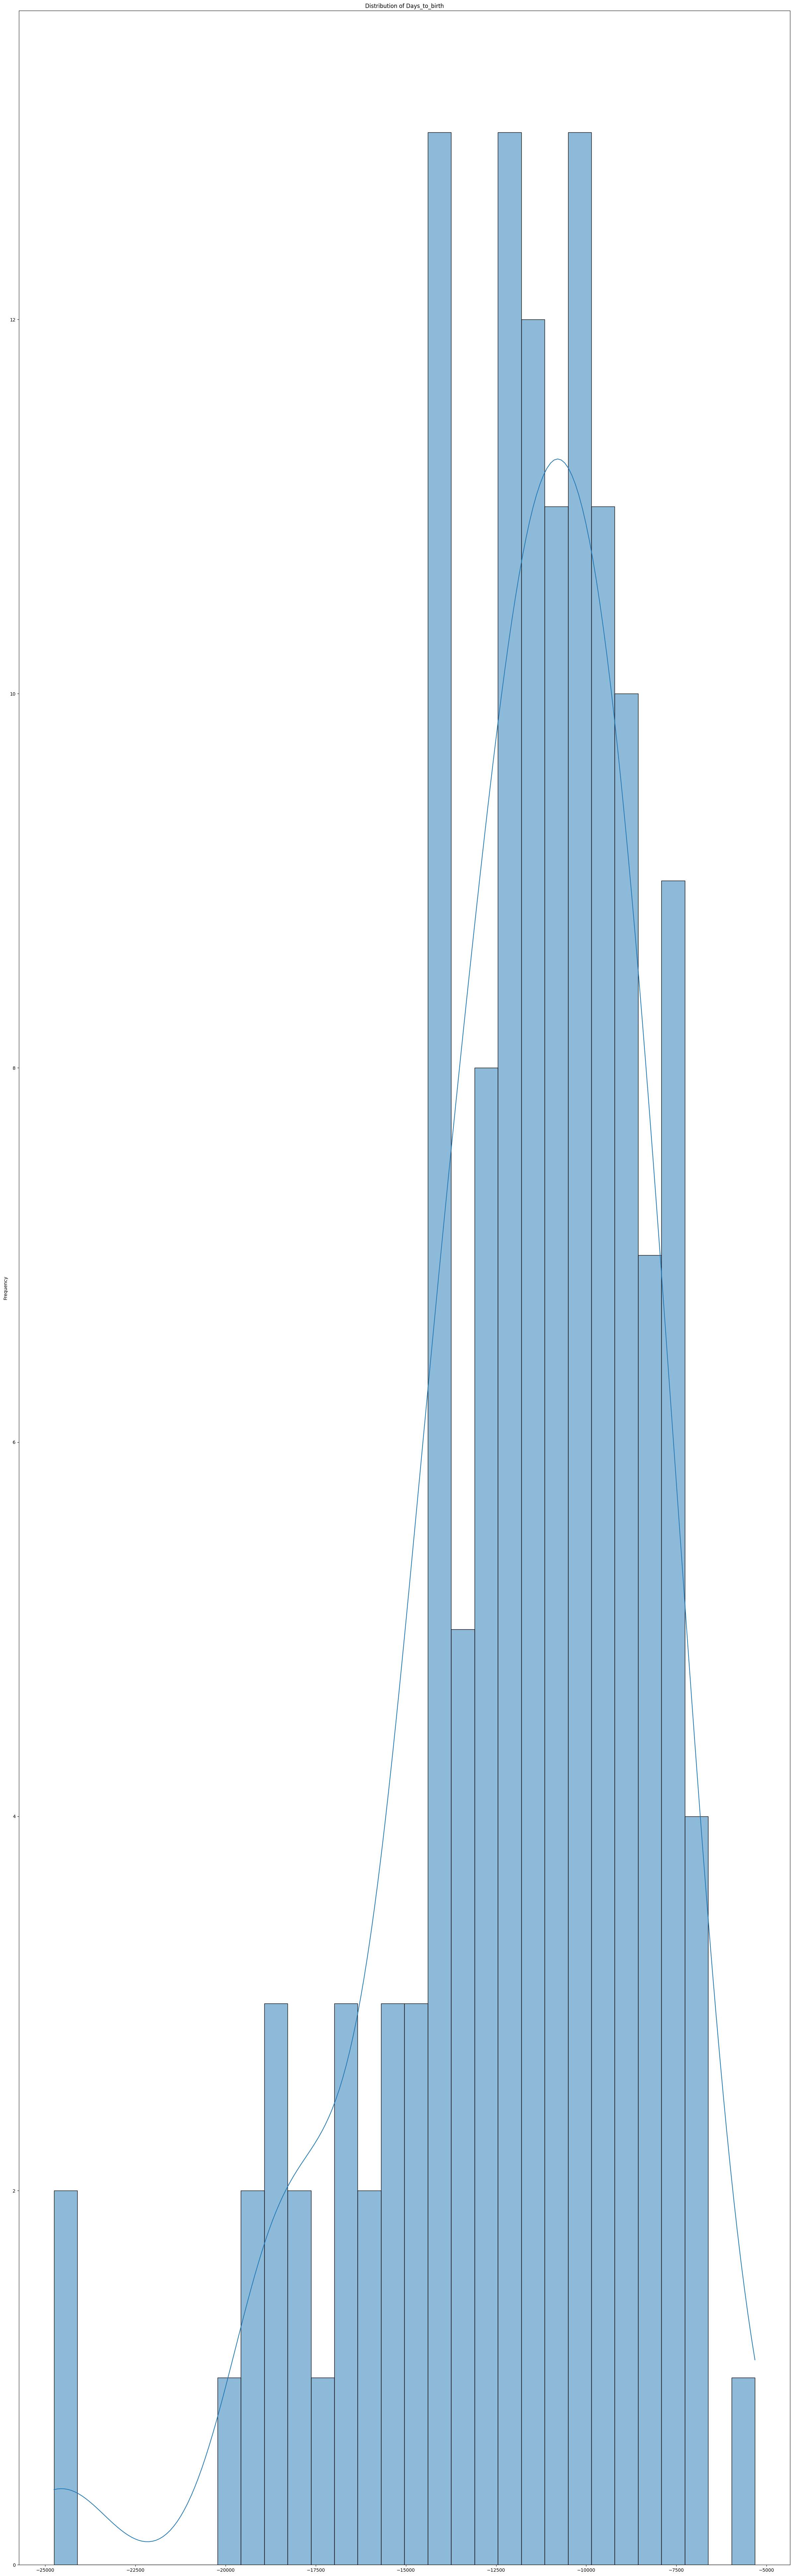

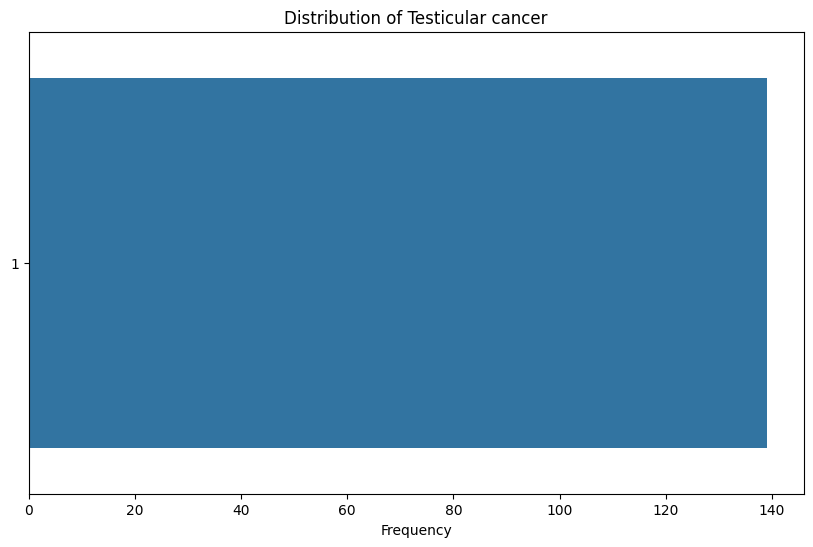

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(30, 100))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])


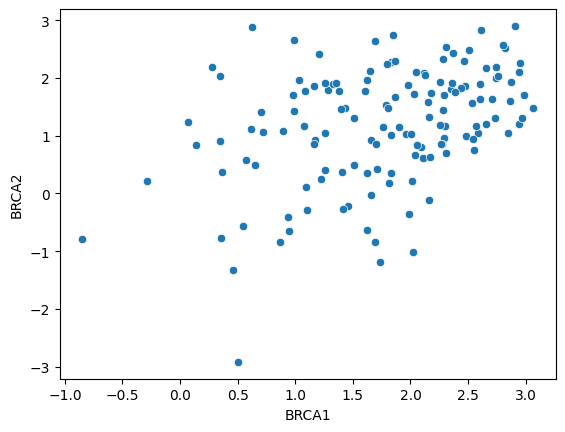

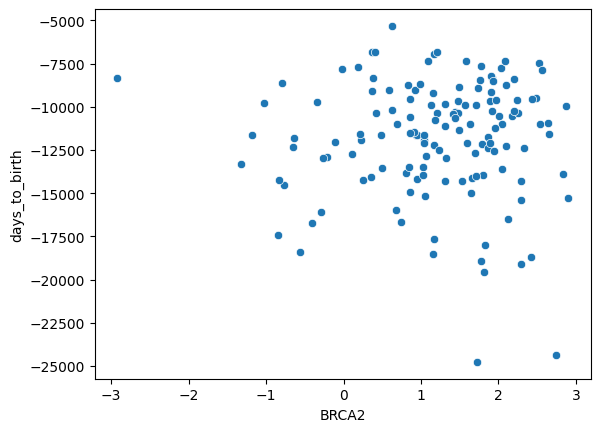

In [22]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

# 3. Do regression & Cross Validation

In [24]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,GHDC,H19,SDK2,GRP,TPRN,THSD4,KIAA0895L,CHST9,CHST8,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Testicular Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,31,-1.463997,0.653228,-0.950242,-1.341871,-1.246386,-0.192312,0.363571,-3.996847,0.610803,...,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788,1
TCGA-2G-AAEX-01,38,-1.307097,1.092128,2.463858,-2.117471,0.126514,-0.568512,0.113871,-1.720447,4.359403,...,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988,1
TCGA-2G-AAF1-01,28,-1.197597,0.379128,-0.520742,-1.556971,-1.330386,-0.695012,0.624471,-1.733247,-0.364197,...,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388,1
TCGA-2G-AAF4-01,30,-1.449497,-1.236272,1.108258,-2.104071,-0.793886,-1.284412,0.570271,-3.102147,2.185303,...,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188,1
TCGA-2G-AAF6-01,28,-1.344497,-0.081872,3.079258,-2.292971,-0.061786,-1.683712,0.385371,-2.084847,2.615303,...,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488,1


In [25]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_8752\1545064521.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: divide by zero encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.9703703703703702


In [29]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()  



In [30]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)


Regression Results:

For RNF11:

For age:
age: Coefficient = -4.7146042729354686e-32, p-value = 4.223302609399503e-29



In [31]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between RNF gene and Testicular Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the RNF gene and Testicular Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the RNF gene and Testicular Cancer when considering the influence of age.




In [32]:
threshold = 0.2
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: age
Coefficient is negative, and it is statistically significant (p-value < 0.2).




In [33]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:




Hypothesis Confirmation and Conclusion:

Variable: RNF11
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Colon Cancer when considering the influence of age.

Variable: RNF12
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Colon Cancer when considering the influence of age.


Hypothesis Confirmation and Conclusion:

Variable: RNF11
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Colon Cancer when considering the influence of age.

Variable: RNF12
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Colon Cancer when considering the influence of age.
